## 2.4.2 Drill: Prepare Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

In [9]:
#Data
df = pd.read_csv('ny_off.csv')
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [10]:
df.dtypes

City                             object
Population                       object
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                          object
Aggravated\nassault              object
Property\ncrime                  object
Burglary                         object
Larceny-\ntheft                  object
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

In [12]:
#Replace "," with nothing
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted

In [13]:
df.fillna(0)
df['Population'] = df['Population'].apply(lambda x: convert_number(x))
df['Murder'] = df['Murder'].apply(lambda x: convert_number(x))
df['Robbery'] = df['Robbery'].apply(lambda x: convert_number(x))
df['Property\ncrime'] = df['Property\ncrime'].apply(lambda x: convert_number(x))
df['Larceny-\ntheft'] = df['Larceny-\ntheft'].apply(lambda x: convert_number(x))

In [14]:
df.dtypes

City                             object
Population                      float64
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                         float64
Aggravated\nassault              object
Property\ncrime                 float64
Burglary                         object
Larceny-\ntheft                 float64
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

In [15]:
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan


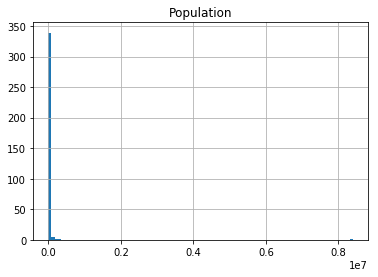

Median  7233.5
Std  450037.3675209857
Outliers above  907308.2350419714


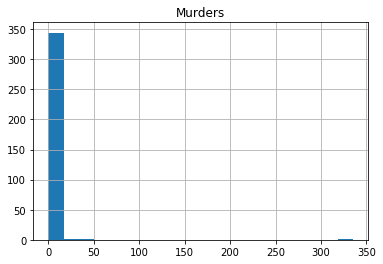

Median  0.0
Std  18.303672792887784
Outliers above  36.60734558577557


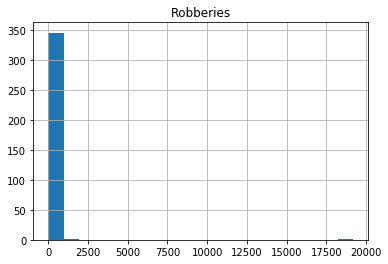

Median  1.0
Std  1031.032873295524
Outliers above  2063.065746591048


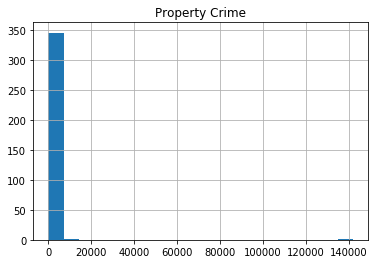

Median  112.5
Std  7659.724745633146
Outliers above  15431.949491266292


In [16]:
#Distributions of variables
df['Population'].hist(bins=100)
plt.title('Population')
plt.show()

#Median, standard deviation and the limit for outliers
median = df.Population.median()
std = df.Population.std()
pop_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out)

df['Murder'].hist(bins=20)
plt.title('Murders')
plt.show()

median = df['Murder'].median()
std = df['Murder'].std()
mur_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', mur_out)

df['Robbery'].hist(bins=20)
plt.title('Robberies')
plt.show()

median = df.Robbery.median()
std = df.Robbery.std()
rob_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', rob_out)

df['Property\ncrime'].hist(bins=20)
plt.title('Property Crime')
plt.show()

median = df['Property\ncrime'].median()
std = df['Property\ncrime'].std()
prop_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', prop_out)

##### Some outliers must be removed.

In [17]:
#Turning outliers into None
df['Population'] = df.Population.map(lambda x: x if x < pop_out else None)
df['Murder'] = df.Murder.map(lambda x: x if x < mur_out else None)
df['Robbery'] = df.Robbery.map(lambda x: x if x < rob_out else None)
df['Property\ncrime'] = df['Property\ncrime'].map(lambda x: x if x < prop_out else None)

In [18]:
#examining highest values in each category.  
print(df.Population.dropna().sort_values(ascending=False).head())
print(df['Murder'].dropna().sort_values(ascending=False).head())
print(df.Robbery.dropna().sort_values(ascending=False).head())
print(df['Property\ncrime'].dropna().sort_values(ascending=False).head())

35    258789.000
272   210562.000
346   199134.000
310   143834.000
7     118296.000
Name: Population, dtype: float64
310   21.000
140   10.000
3      8.000
285    8.000
321    7.000
Name: Murder, dtype: float64
35    1322.000
272    918.000
310    400.000
346    390.000
206    228.000
Name: Robbery, dtype: float64
35    12491.000
272   10051.000
310    6473.000
3      4090.000
218    2807.000
Name: Property\ncrime, dtype: float64


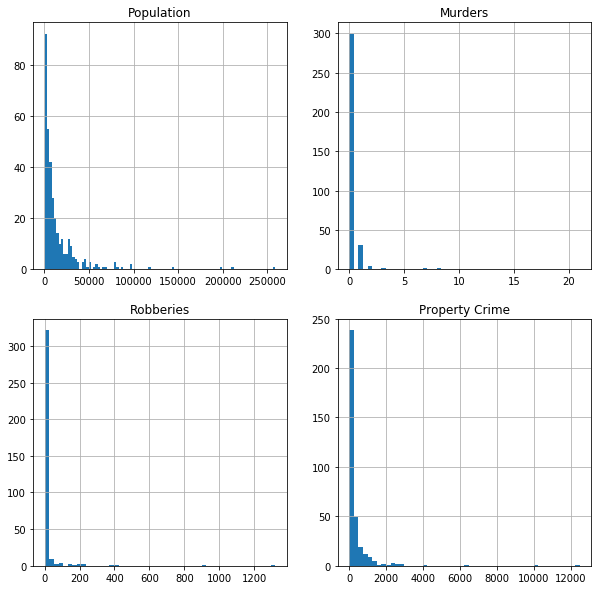

In [21]:
#re-plotting post-outlier-removal
plt.figure(figsize=(10,10))
plt.subplot(221)
df['Population'].hist(bins=100)
plt.title('Population')

plt.subplot(222)
df['Murder'].hist(bins=50)
plt.title('Murders')

plt.subplot(223)
df['Robbery'].hist(bins=50)
plt.title('Robberies')

plt.subplot(224)
df['Property\ncrime'].hist(bins=50)
plt.title('Property Crime')

plt.show()

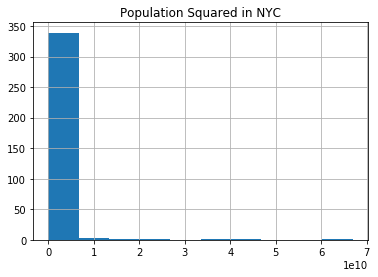

In [22]:
#creating population squared feature
df['PopSq'] = df['Population']**2
df['PopSq'].hist()
plt.title('Population Squared in NYC')
plt.show()

In [23]:
#Defining categorical converting function

def convert_category(number):
    value = convert_number(number)
    
    if value>0:
        return 1
    else:
        return 0

In [24]:
#Converting "Murder" and "Robbery" into categorical

df['Murder_categorical'] = df['Murder'].apply(lambda x: convert_category(x))
df['Robbery_categorical'] = df['Robbery'].apply(lambda x: convert_category(x))
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,PopSq,Murder_categorical,Robbery_categorical
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000,3463321.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000,6640929.000,0,0
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000,8099716.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan,9595377936.000,1,1
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan,40806544.000,0,1


In [26]:
#Isolating features
features = df[['Population', 'PopSq', 'Murder_categorical', 'Robbery_categorical', 'Property\ncrime']].dropna()
features.head()

,Population,PopSq,Murder_categorical,Robbery_categorical,Property crime
0,1861.000,3463321.000,0,0,12.000
1,2577.000,6640929.000,0,0,24.000
2,2846.000,8099716.000,0,0,16.000
3,97956.000,9595377936.000,1,1,4090.000
4,6388.000,40806544.000,0,1,223.000


In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 5 columns):
Population             347 non-null float64
PopSq                  347 non-null float64
Murder_categorical     347 non-null int64
Robbery_categorical    347 non-null int64
Property
crime         347 non-null float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB
